- Real world datasets, distributions
- Aic and Bic

> Why do we fit distributions to data?

The short answer would be to make life easier in using the data to make predictions. For example, we can reduce the observational data to a small number of parameters such as mean and variance. We can then use known properties of our fitted distribution to predict, for example, how likely we are to find a new observation above or below a particular value

> AIC and BIC

-The AIC and BIC are both methods of assessing model fit penalized for the number of estimated parameters.

-The AIC tries to select the model that most adequately describes an unknown, high dimensional reality. This means that reality is never in the set of candidate models that are being considered. On the contrary, BIC tries to find the TRUE model among the set of candidates.

In [ ]:
#pip install fitter

In [ ]:
#pip install distfit

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv("GlobalLandTemperaturesByState.csv")

In [ ]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
df2=df.dropna()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620027 entries, 0 to 645673
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             620027 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          620027 non-null  object 
 4   Country                        620027 non-null  object 
dtypes: float64(2), object(3)
memory usage: 28.4+ MB


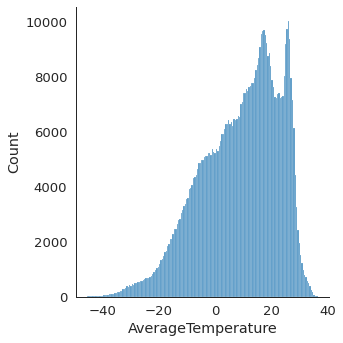

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.5)

sns.displot(df2['AverageTemperature'])

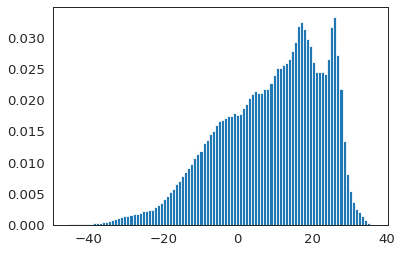

In [ ]:
plt.hist(df2['AverageTemperature'], bins = 100, density = True)
plt.show()

In [ ]:
X = df2['AverageTemperature'].values #creating a numpy array

In [ ]:
from distfit import distfit

# Initialize distfit
dist = distfit()

# Determine best-fitting probability distribution for data
dist.fit_transform(X)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.02 sec] [RSS: 0.00121708] [loc=8.993 scale=13.772]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0100442] [loc=-45.389 scale=54.382]
[distfit] >[pareto    ] [105. sec] [RSS: 0.00984762] [loc=-1396061.555 scale=1396016.165]
[distfit] >[dweibull  ] [32.1 sec] [RSS: 0.00127518] [loc=8.682 scale=12.513]
[distfit] >[t         ] [73.3 sec] [RSS: 0.00121704] [loc=8.994 scale=13.772]
[distfit] >[genextreme] [229. sec] [RSS: 0.000524013] [loc=5.368 scale=14.638]
[distfit] >[gamma     ] [65.7 sec] [RSS: 0.00137004] [loc=-193.565 scale=0.985]
[distfit] >[lognorm   ] [155. sec] [RSS: 0.00130617] [loc=-770.485 scale=779.222]
[distfit] >[beta      ] [74.6 sec] [RSS: 0.000677145] [loc=-45.392 scale=81.731]
[distfit] >[uniform   ] [0.03 sec] [RSS: 0.00577335] [loc=-45.389 scale=81.728]
[distfit] >[loggamma  ] [14.4 sec] [RSS: 0.00062817] [loc=17.227 scale=10.265]
[distfit] >Compute confidence interval [parametric]


{'alpha': 0.05,
 'bins': 50,
 'bound': 'both',
 'distr': 'popular',
 'f': 1.5,
 'histdata': (array([8.88036958e-06, 3.05879397e-05, 6.80828335e-05, 1.18404928e-04,
         2.02275085e-04, 3.03905981e-04, 4.77566542e-04, 7.53844707e-04,
         1.08044497e-03, 1.35968325e-03, 1.59747982e-03, 1.78988782e-03,
         2.16779689e-03, 2.35132452e-03, 2.95617636e-03, 3.77909061e-03,
         4.83980142e-03, 6.08897341e-03, 7.39241432e-03, 8.76097795e-03,
         1.02055181e-02, 1.15563210e-02, 1.33590360e-02, 1.47720014e-02,
         1.63675078e-02, 1.69595325e-02, 1.73946706e-02, 1.77933005e-02,
         1.82639601e-02, 1.98713070e-02, 2.12319770e-02, 2.11352796e-02,
         2.18644566e-02, 2.33889201e-02, 2.51521668e-02, 2.58280616e-02,
         2.72064923e-02, 3.06372751e-02, 3.20601076e-02, 2.92884456e-02,
         2.53248406e-02, 2.45857965e-02, 2.54550861e-02, 3.25613551e-02,
         2.45473149e-02, 1.07699149e-02, 4.55760301e-03, 2.28521511e-03,
         1.09031204e-03, 1.440593

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca4830efd0>)

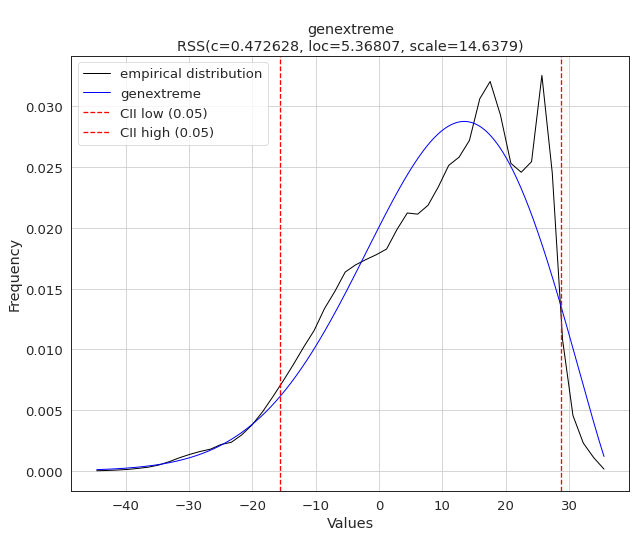

In [ ]:
dist.plot()

[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca4819fc90>)

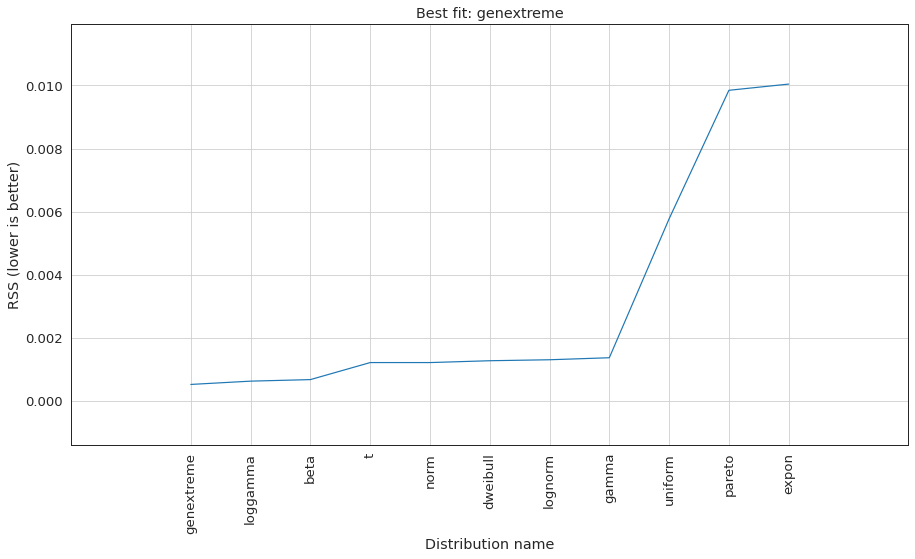

In [ ]:
dist.plot_summary()

In [ ]:
# we can also make predictions on new datapoints based on the fit
y = [-25,3,4,5,6,10,11,12,18,20, 30, 45]
results = dist.predict(y)

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]


[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca43b00250>)

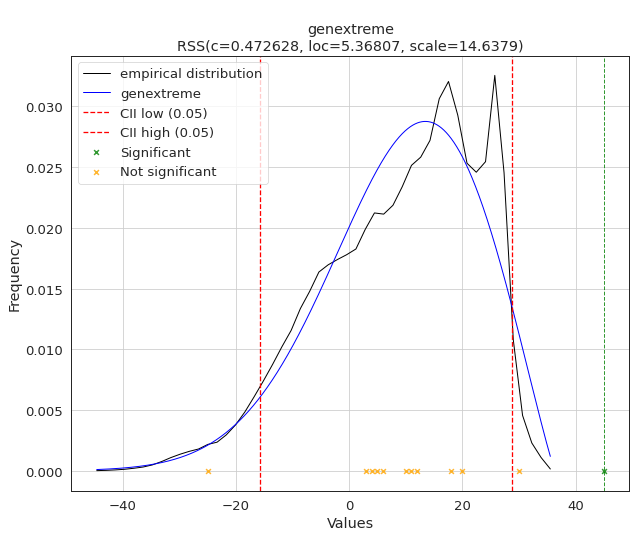

In [ ]:
# The plot function will now also include the predictions of y
dist.plot()